In [3]:
import torch
import pickle
baseDir = './dl-adv-train/leaf/data/femnist/'

In [4]:
from PIL import Image
def readImage(path):
    size=32,32
    img = Image.open(path)
    gray = img
    gray = img.convert('L')
    gray.thumbnail(size, Image.ANTIALIAS)
    arr = np.asarray(gray).copy()
    return arr
    #print(arr.shape)
    #vec = arr.flatten()
    #vec = vec / 255  # scale all pixel values to between 0 and 1
    #vec = vec.tolist()

In [196]:
userExamplesMap = pickle.load(open("{}data/intermediate/images_by_writer.pkl".format(d),'rb' ))
print(userExamplesMap[0][1][0])

('data/raw_data/by_write/hsf_2/f1183_38/c1183_38/c1183_38_00065.png', '44')


In [260]:
from collections import defaultdict
userExamplesMap = pickle.load(open("{}data/intermediate/images_by_writer.pkl".format(d),'rb' ))
lstRecords      = []
lstUserRecords  = []
i = 0
for user,examples in userExamplesMap:
    print(user,len(examples))
    numDigits = 0
    numLetters = 0
    totalExamples = 0
    counts = defaultdict(int)
    for example in examples:
        #type_ = example[0].split('/')[-1][0]
        #isDigit = type_ == 'd'
        label = None
        c = example[1]
        '''
            - 0 through 9 for classes representing respective numbers
            - 10 through 35 for classes representing respective uppercase letters
            - 36 through 61 for classes representing respective lowercase letters
        '''
        isDigit = False
        alphabet = None
        if(c.isdigit() and int(c) < 40):
            label = int(c)-30
            isDigit = True
            numDigits+=1
            counts[str(label)]+=1
        elif int(c, 16) <= 90: # uppercase
            label = (int(c, 16) - 55)
            alphabet = ascii(chr(int(c,16)))
            numLetters+=1
            counts[str(alphabet)]+=1
        else:
            label = (int(c, 16) - 61)
            alphabet = ascii(chr(int(c,16)))
            numLetters+=1
            
            counts[str(alphabet)]+=1
        
        record = {"userId":user,"userIndex":i,"filePath":example[0],
                  "rawLabel":example[1],"isDigit":isDigit,'label':label,
                  "alphabet":alphabet}
        lstRecords.append(record)
        totalExamples+=1
    rcd = {'userId':user,"userIndex":i,"totalExamples":totalExamples,
                           "numDigits":numDigits,"numLetters":numLetters}
    rcd.update(counts)
    lstUserRecords.append(rcd)
    i+=1


f1183_38 308
f1494_41 357
f1364_24 274
f1044_04 345
f1387_23 263
f1490_31 274
f1288_23 183
f1447_28 257
f1178_03 247
f1454_12 247
f1206_36 310
f1300_41 219
f1267_20 257
f1213_10 275
f1443_09 339
f1138_27 233
f1137_07 325
f1282_39 396
f1497_28 336
f1160_23 232
f1280_21 100
f1125_41 344
f1214_39 310
f1230_10 269
f1261_39 132
f1291_26 254
f1052_05 293
f1384_42 131
f1123_09 259
f1473_30 364
f1191_18 345
f1088_00 362
f1477_37 281
f1340_02 276
f1485_22 344
f1193_46 198
f1104_24 324
f1219_26 307
f1158_21 232
f1217_02 305
f1462_01 302
f1029_30 314
f1424_45 322
f1323_11 337
f1374_18 274
f1113_16 336
f1120_05 401
f1251_10 388
f1496_39 242
f1434_10 271
f1392_44 360
f1143_43 374
f1165_30 180
f1161_00 212
f1350_18 352
f1459_30 222
f1318_17 298
f1025_22 221
f1108_14 286
f1131_00 327
f1468_04 209
f1356_29 267
f1474_13 258
f1190_46 268
f1362_31 287
f1335_30 292
f1398_48 209
f1407_18 238
f1192_26 207
f1097_20 297
f1344_45 245
f1427_16 344
f1441_43 272
f1186_07 277
f1466_48 297
f1305_42 292
f1492_06 316

f3738_16 168
f4081_24 182
f3691_47 160
f4001_45 179
f3646_15 169
f4074_12 140
f3967_43 148
f3978_35 167
f4036_01 179
f4006_12 177
f3894_37 166
f3903_05 168
f3623_42 159
f3686_49 183
f3961_03 169
f3837_30 177
f3678_17 181
f3703_10 158
f3929_28 136
f3729_27 181
f3850_20 178
f3907_43 169
f3710_43 176
f4000_40 181
f3802_05 160
f3999_42 153
f3937_40 171
f3631_34 173
f3614_06 176
f4062_17 179
f4099_10 174
f3698_01 166
f3880_29 160
f3629_19 173
f3889_26 170
f3617_43 159
f4085_42 138
f3609_24 182
f3902_40 179
f3626_35 145
f3639_43 183
f4035_29 173
f3767_45 171
f3993_05 181
f3856_34 158
f3640_13 164
f3770_21 167
f3690_41 169
f4040_28 175
f3820_39 109
f4050_05 138
f3901_45 95
f4031_33 175
f3654_03 177
f3963_34 182
f3939_49 182
f4055_44 176
f3813_08 150
f3888_32 148
f3845_39 171
f4037_48 174
f3793_06 153
f3602_12 150
f3730_33 172
f3864_42 176
f3622_43 172
f4030_29 156
f3814_43 180
f3973_27 176
f3716_43 181
f3825_12 167
f3737_46 169
f4060_46 170
f3632_10 149
f3762_40 158
f3641_13 167
f3662_24 175


f0235_17 311
f0309_42 336
f0130_28 378
f0166_12 311
f0375_07 272
f0092_16 383
f0484_46 360
f0313_43 333
f0455_26 233
f0097_05 356
f0128_00 333
f0463_09 369
f0212_24 325
f0343_35 366
f0315_31 426
f0394_00 262
f0152_02 226
f0346_40 159
f0477_46 392
f0136_18 354
f0196_10 402
f0285_23 349
f0124_11 369
f0055_09 374
f0147_13 355
f0291_06 338
f0443_21 418
f0298_13 376
f0039_14 374
f0049_32 394
f0369_34 322
f0003_42 398
f0399_44 393
f0415_28 385
f0101_44 355
f0205_15 333
f0221_37 346
f0077_13 410
f0497_00 289
f0120_29 302
f0188_36 402
f0486_05 324
f0139_23 351
f0023_08 419
f0425_42 227
f0208_05 414
f0001_41 414
f0454_20 389
f0312_43 417
f0466_11 402
f0027_29 447
f0157_12 373
f0317_44 421
f0095_41 404
f0395_15 423
f0277_33 333
f0471_15 332
f0106_05 317
f0499_10 296
f0228_36 304
f0392_15 393
f0090_10 404
f0430_02 351
f0044_12 344
f0251_00 368
f0040_25 376
f0435_37 303
f0065_00 380
f0295_17 383
f0045_12 328
f0304_23 375
f0252_30 404
f0407_39 319
f0184_49 327
f0230_04 347
f0427_40 311
f0433_14 222

f1886_18 164
f1978_04 165
f1641_09 147
f1718_29 161
f1751_08 143
f2051_15 171
f1862_37 173
f1581_39 158
f1840_35 169
f1936_06 173
f1549_10 127
f1629_49 176
f1758_36 166
f2038_08 159
f1795_30 172
f1880_06 146
f1813_25 151
f1726_01 40
f1972_15 137
f1644_01 179
f1542_30 104
f2003_18 163
f1876_22 128
f1959_39 144
f1569_23 160
f1847_26 158
f2033_24 172
f1556_19 68
f1508_14 134
f1919_17 107
f1943_00 162
f1501_00 161
f1937_04 145
f1736_04 150
f2027_41 34
f1966_31 130
f1586_22 159
f1591_47 163
f1889_05 177
f1565_04 172
f1653_02 147
f1655_34 114
f1769_04 156
f1684_08 169
f1740_04 171
f1676_30 175
f1628_45 155
f1583_41 181
f1746_28 150
f2098_02 164
f1590_15 166
f2055_31 159
f1547_06 169
f1895_37 175
f2069_42 107
f1904_33 158
f1614_22 164
f1802_35 109
f1796_21 150
f1609_27 163
f1659_04 155
f1715_20 172
f2060_18 169
f1914_02 116
f1955_30 156
f1939_13 139
f1982_16 126
f1909_43 140
f2067_38 73
f2047_48 108
f1819_37 158
f1530_18 175
f1911_44 124
f1517_35 108
f1610_32 171
f1964_32 163
f1511_41 168
f15

In [250]:
import pandas as pd
df = pd.DataFrame(lstRecords,columns=["userId","userIndex","filePath","rawLabel","isDigit","label",'alphabet'])
df.groupby('userIndex')['filePath','isDigit'].count()
#df[df["isDigit"]==True].head(100)


,filePath,isDigit
userIndex,,
0,308,308
1,357,357
2,274,274
3,345,345
4,263,263
5,274,274
6,183,183
7,257,257
8,247,247


In [261]:
dfUsers = pd.DataFrame(lstUserRecords)

dfUsers.head()
print(dfUsers.columns)

Index([''A'', ''B'', ''C'', ''D'', ''E'', ''F'', ''G'', ''H'', ''I'', ''J'',
       ''K'', ''L'', ''M'', ''N'', ''O'', ''P'', ''Q'', ''R'', ''S'', ''T'',
       ''U'', ''V'', ''W'', ''X'', ''Y'', ''Z'', ''a'', ''b'', ''c'', ''d'',
       ''e'', ''f'', ''g'', ''h'', ''i'', ''j'', ''k'', ''l'', ''m'', ''n'',
       ''o'', ''p'', ''q'', ''r'', ''s'', ''t'', ''u'', ''v'', ''w'', ''x'',
       ''y'', ''z'', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'numDigits', 'numLetters', 'totalExamples', 'userId', 'userIndex'],
      dtype='object')


In [266]:
dfUsers[['numLetters','numDigits','totalExamples','userId','userIndex']].head()

,numLetters,numDigits,totalExamples,userId,userIndex
0,187,121,308,f1183_38,0
1,231,126,357,f1494_41,1
2,207,67,274,f1364_24,2
3,232,113,345,f1044_04,3
4,147,116,263,f1387_23,4


404053


,'A','B','C','D','E','F','G','H','I','J',...,5,6,7,8,9,numDigits,numLetters,totalExamples,userId,userIndex
0,1.0,2.0,7.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,...,12.0,12.0,12.0,12.0,12.0,121,187,308,f1183_38,0
1,3.0,2.0,7.0,3.0,1.0,4.0,1.0,1.0,8.0,2.0,...,13.0,13.0,13.0,12.0,11.0,126,231,357,f1494_41,1
2,1.0,2.0,6.0,0.0,0.0,6.0,0.0,1.0,12.0,1.0,...,2.0,5.0,6.0,9.0,10.0,67,207,274,f1364_24,2
3,2.0,1.0,8.0,1.0,0.0,6.0,0.0,1.0,8.0,2.0,...,12.0,11.0,11.0,11.0,10.0,113,232,345,f1044_04,3
4,10.0,3.0,6.0,6.0,1.0,8.0,1.0,1.0,4.0,2.0,...,10.0,12.0,12.0,12.0,12.0,116,147,263,f1387_23,4


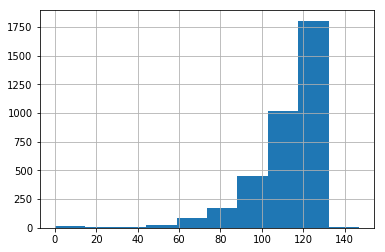

In [315]:
dfUsers['numDigits'].hist()
print(dfUsers['numDigits'].sum())
dfUsers= dfUsers.fillna(0)
dfUsers.head()

3403 392487
783535


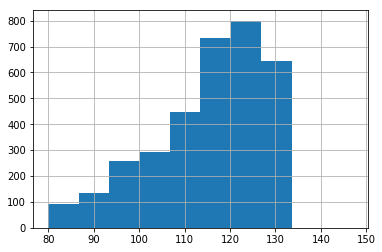

In [318]:
dfUsers2 = dfUsers[dfUsers['numDigits']>=80]
dfUsers2['numDigits'].hist()
print(len(dfUsers2),dfUsers2['numDigits'].sum())
print(dfUsers2['totalExamples'].sum())
dfUsers2.to_csv('femnist_users_stats_with_digit_ex_ge_80.csv',index=False)

In [321]:
print(len(df))
df.to_csv('femnist_all_records.csv',index=False)

817851


In [320]:
dfUsers.to_csv('femnist_users_stats_all.csv',index=False)

In [296]:
print(len(df))
df2 = dfUsers2[['userId']].join(df.set_index('userId'),on='userId',how='inner')
print(len(df2))
print(len(df2[df2['isDigit']]))

817851
783535
392487


In [297]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.1)
print(len(train),len(test))

705181 78354


In [309]:
trainDigit = train[train['isDigit']]
testDigit  = test[test['isDigit']]
print(len(trainDigit),len(testDigit))
trainDigit.to_csv('train_femnist_ge_80_samples_per_user_90_pct.csv', index=False)
testDigit.to_csv('test_femnist_ge_80_samples_per_user_10_pct.csv', index=False)

353114 39373


In [312]:
df_train = pd.read_csv('train_femnist_ge_80_samples_per_user_90_pct.csv')
print(len(df_train))
df_train.head()

353114


,userId,userIndex,filePath,rawLabel,isDigit,label,alphabet
0,f3732_30,552,data/raw_data/by_write/hsf_7/f3732_30/d3732_30...,32,True,2,NaN
1,f1101_38,461,data/raw_data/by_write/hsf_2/f1101_38/d1101_38...,33,True,3,NaN
2,f3539_44,2165,data/raw_data/by_write/hsf_6/f3539_44/d3539_44...,38,True,8,NaN
3,f2233_79,1195,data/raw_data/by_write/hsf_4/f2233_79/d2233_79...,34,True,4,NaN
4,f2283_59,1483,data/raw_data/by_write/hsf_4/f2283_59/d2283_59...,37,True,7,NaN


In [289]:
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                        'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key':['K0','K1','K5','K6'],'V':['V0','V1','V5','V6']})
print(df1.head())
print(other.head())
df_ = df1.join(other.set_index('key'),on='key',how='inner')
print(df_)


  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3
4  K4  A4
  key   V
0  K0  V0
1  K1  V1
2  K5  V5
3  K6  V6
  key   A   V
0  K0  A0  V0
1  K1  A1  V1
5  K5  A5  V5


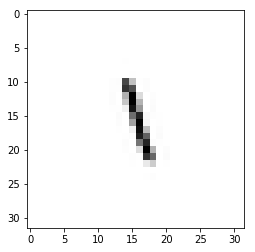

In [238]:
z = readImage(d+ userExamplesMap[0][1][4][0])
plt.imshow(z,cmap='gray')

3597


In [138]:
x = pickle.load(open("{}data/intermediate/images_by_writer.pkl".format(d),'rb' ))
lstX = []
lstY = []
onlyDigits = True
for filePath,label in x[0][1]:
    type_ = filePath.split('/')[-1][0]
    if(onlyDigits):
        if(type_=='d'):
            lstX.append(readImage(d+filePath)[None,:,:])
            lstY.append(int(label)-30)
    

In [146]:
from torch.utils import data
X = np.array(lstX)
Y = np.array(lstY)
X = torch.from_numpy(X).float()
Y = torch.from_numpy(Y)
dataset1= data.TensorDataset(X,Y)

In [141]:
print(X.shape)

torch.Size([121, 1, 32, 32])


tensor(0)


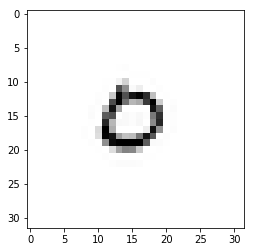

In [100]:
i= 2
plt.imshow(lstX[i],cmap='gray')
print(lstY[i])

In [5]:
import torch.nn as nn
from collections import OrderedDict


class LeNet5(nn.Module):
    """
    Input - 1x32x32
    C1 - 6@28x28 (5x5 kernel)
    tanh
    S2 - 6@14x14 (2x2 kernel, stride 2) Subsampling
    C3 - 16@10x10 (5x5 kernel, complicated shit)
    tanh
    S4 - 16@5x5 (2x2 kernel, stride 2) Subsampling
    C5 - 120@1x1 (5x5 kernel)
    F6 - 84
    tanh
    F7 - 10 (Output)
    """
    def __init__(self):
        super(LeNet5, self).__init__()

        self.convnet = nn.Sequential(OrderedDict([
            ('c1', nn.Conv2d(1, 6, kernel_size=(5, 5))),
            ('relu1', nn.ReLU()),
            ('s2', nn.MaxPool2d(kernel_size=(2, 2), stride=2)),
            ('c3', nn.Conv2d(6, 16, kernel_size=(5, 5))),
            ('relu3', nn.ReLU()),
            ('s4', nn.MaxPool2d(kernel_size=(2, 2), stride=2)),
            ('c5', nn.Conv2d(16, 120, kernel_size=(5, 5))),
            ('relu5', nn.ReLU())
        ]))

        self.fc = nn.Sequential(OrderedDict([
            ('f6', nn.Linear(120, 84)),
            ('relu6', nn.ReLU()),
            ('f7', nn.Linear(84, 10)),
            ('sig7', nn.LogSoftmax(dim=-1))
        ]))

    def forward(self, img):
        output = self.convnet(img)
        output = output.view(img.size(0), -1)
        output = self.fc(output)
        return output



In [12]:
from torch.utils import data
import pandas as pd
import numpy as np
dfTrain = pd.read_csv('train_femnist_ge_80_samples_per_user_90_pct.csv')
dfTrain_0 = dfTrain[dfTrain['userIndex']==0]
dfTest = pd.read_csv('test_femnist_ge_80_samples_per_user_10_pct.csv')

In [9]:
def createDataset(df):
    lstY = list(df['label'])
    lstX = [readImage(baseDir+path)[None,:,:] for path in df['filePath']]
    X = np.array(lstX)
    Y = np.array(lstY)
    X = torch.from_numpy(X).float()
    Y = torch.from_numpy(Y)
    dataset_= data.TensorDataset(X,Y)
    return dataset_

In [13]:
trainData = createDataset(dfTrain_0)
testData = createDataset(dfTest)

In [338]:
print(len(testData))

39373


In [15]:
#from lenet import LeNet5
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader



#testloader = DataLoader(data_test, batch_size=1024, num_workers=8)
net = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=2e-3)
trainloader= DataLoader(trainData, batch_size=5, shuffle=True, num_workers=8)

data_train_loader = trainloader

def train(epoch):
    global cur_batch_win
    net.train()
    loss_list, batch_list = [], []
    for i, (images, labels) in enumerate(data_train_loader):
        optimizer.zero_grad()

        output = net(images)

        loss = criterion(output, labels)

        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)

        if i % 10 == 0:
            print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))
        '''
        # Update Visualization
        if viz.check_connection():
            cur_batch_win = viz.line(torch.Tensor(loss_list), torch.Tensor(batch_list),
                                     win=cur_batch_win, name='current_batch_loss',
                                     update=(None if cur_batch_win is None else 'replace'),
                                     opts=cur_batch_win_opts)
        '''
        loss.backward()
        optimizer.step()


def test(net,data_test_loader):
    net.eval()
    total_correct = 0
    avg_loss = 0.0
    n = 0
    for i, (images, labels) in enumerate(data_test_loader):
        output = net(images)
        avg_loss += criterion(output, labels).sum()
        pred = output.detach().max(1)[1]
        #print(pred,labels)
        total_correct += pred.eq(labels.view_as(pred)).sum()
        n+= len(labels)
    avg_loss /= n
    print(n)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(), float(total_correct) / n))
    return float(total_correct) /n

def main():
    model_path = './ckpts/good-train/';
    net_dw = LeNet5()
    #net_dw = net.to(device)


    #checkpoint = torch.load('./ckpts/bad-train/lenet_5_bad_delta_till_epoch_10.ckpt')
    #net_dw.load_state_dict(checkpoint)
    num_epochs = 10
    for e in range(1, num_epochs+1):
        train(e)
        test(net,data_train_loader)
        #torch.save(net.state_dict(), model_path+'lenet_5_good_till_epoch_'+str(e)+'.ckpt')
        #print("****")
        #apply_attack_and_test(net_dw)

    #torch.save(net.state_dict(), model_path + 'shuf2_lenet_5_good_till_epoch_' + str(num_epochs) + '.ckpt')

if __name__ == '__main__':
    main()


Train - Epoch 1, Batch: 0, Loss: 8.282230
Train - Epoch 1, Batch: 10, Loss: 3.045604
Train - Epoch 1, Batch: 20, Loss: 2.309747
112
Test Avg. Loss: 0.463246, Accuracy: 0.089286
Train - Epoch 2, Batch: 0, Loss: 2.285026
Train - Epoch 2, Batch: 10, Loss: 1.926127
Train - Epoch 2, Batch: 20, Loss: 2.217219
112
Test Avg. Loss: 0.334228, Accuracy: 0.446429
Train - Epoch 3, Batch: 0, Loss: 1.311530
Train - Epoch 3, Batch: 10, Loss: 1.445074
Train - Epoch 3, Batch: 20, Loss: 0.937222
112
Test Avg. Loss: 0.205936, Accuracy: 0.678571
Train - Epoch 4, Batch: 0, Loss: 0.859439
Train - Epoch 4, Batch: 10, Loss: 0.515890
Train - Epoch 4, Batch: 20, Loss: 0.078100
112
Test Avg. Loss: 0.076992, Accuracy: 0.866071
Train - Epoch 5, Batch: 0, Loss: 0.079233
Train - Epoch 5, Batch: 10, Loss: 0.168932
Train - Epoch 5, Batch: 20, Loss: 0.196113
112
Test Avg. Loss: 0.025510, Accuracy: 0.973214
Train - Epoch 6, Batch: 0, Loss: 0.082318
Train - Epoch 6, Batch: 10, Loss: 0.003873
Train - Epoch 6, Batch: 20, Lo

In [16]:
testLoader= DataLoader(testData, batch_size=128, shuffle=True, num_workers=8)
test(net,testLoader)

39373
Test Avg. Loss: 0.026673, Accuracy: 0.414142


0.4141416706880349

Test Avg. Loss: 4.238490, Accuracy: 0.600000


0.6